## Wine Quality
Dataset description:
- 11 input variables based on physicochemical tests
- 1 output variable `quality` (0 for bad and 1 for good)

Project goals:
1. Implement different logistic regression classifiers
2. Find the best ridge-regularized classifier using hyperparameter tuning 
3. Implement a tuned lasso-regularized feature selection method

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("wine_quality.csv")
features = df.columns[:-1]
X = df[features]
y = df['quality']

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

### Logistic regression without regularization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [7]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.2)

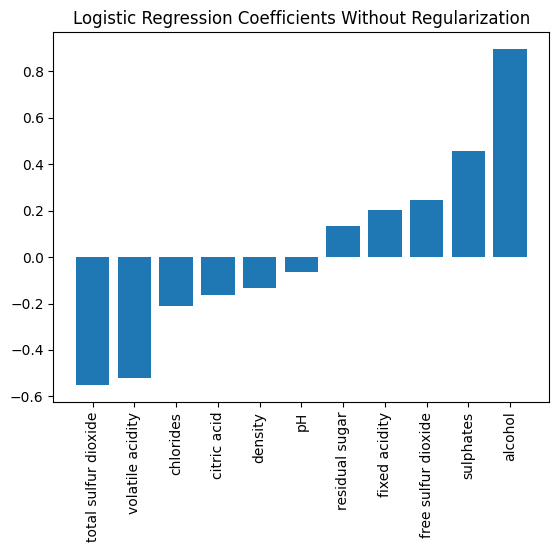

In [27]:
from sklearn.linear_model import LogisticRegression 

clf_no_reg = LogisticRegression(penalty=None)
clf_no_reg.fit(X_train, y_train)
coefficients = clf_no_reg.coef_.flatten()
feat_coef = pd.DataFrame({'features':features, 'coefficients': coefficients}).sort_values(by='coefficients')

fig, ax = plt.subplots()
ax.bar(range(len(feat_coef['features'])), feat_coef['coefficients'])
ax.set_xticks(range(len(feat_coef['features'])), feat_coef['features'], rotation='vertical')
ax.set_title('Logistic Regression Coefficients Without Regularization')
plt.show()

In [31]:
from sklearn.metrics import f1_score
y_pred_no_reg = clf_no_reg.predict(X_test)
f1_no_reg = f1_score(y_pred=y_pred_no_reg, y_true=y_test)
print(f1_no_reg)

0.7266666666666667


### Logistic Regression with L2 Regularization


In [32]:
clf_default = LogisticRegression()
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
f1_default = f1_score(y_pred=y_pred_default, y_true=y_test)
print(f1_default)

0.7266666666666667


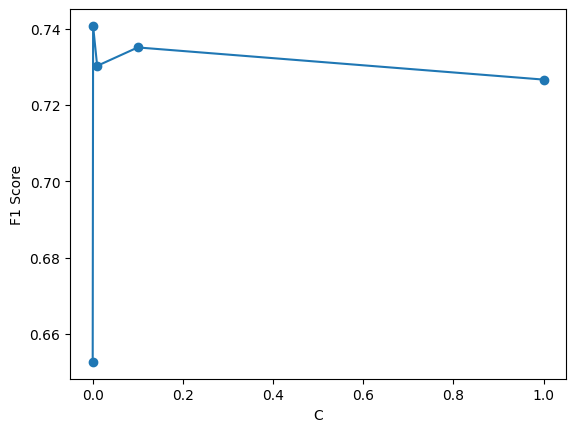

In [35]:
# Trying different values of C 
C_array = np.logspace(-4, 0, 5)
f1_array = []

for C in C_array:
  clf = LogisticRegression(C=C)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_pred=y_pred, y_true=y_test)
  f1_array.append(f1)

plt.plot(C_array, f1_array, marker='o')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

### Hyperparameter Tuning for L2 Regularization

In [40]:
from sklearn.model_selection import GridSearchCV

tuning_C = np.logspace(-4, -2, 100)
l2_model = GridSearchCV(estimator=LogisticRegression(), param_grid={'C': tuning_C}, cv=5, scoring='f1', verbose=1, return_train_score=True)
l2_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.00031...
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             return_train_score=True, scoring='f1', verbose=1)

In [43]:
best_C = l2_model.best_params_['C']
best_score = l2_model.best_score_ 

print(best_C, best_score)

0.0019630406500402726 0.7723336222647887


In [44]:
# Fitting the new model and getting the f1 score for the test data 
clf_best_ridge = LogisticRegression(C=best_C)
clf_best_ridge.fit(X_train, y_train)
y_pred_best = clf_best_ridge.predict(X_test)
f1_best_ridge = f1_score(y_pred=y_pred_best, y_true=y_test)

f1_best_ridge

0.7407407407407408

### Feature Selection using L1 Regularization

In [46]:
from sklearn.linear_model import LogisticRegressionCV 

Cs = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=Cs, cv=5, penalty='l1', scoring='f1', solver='liblinear', verbose=0) 
clf_l1.fit(X, y)


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

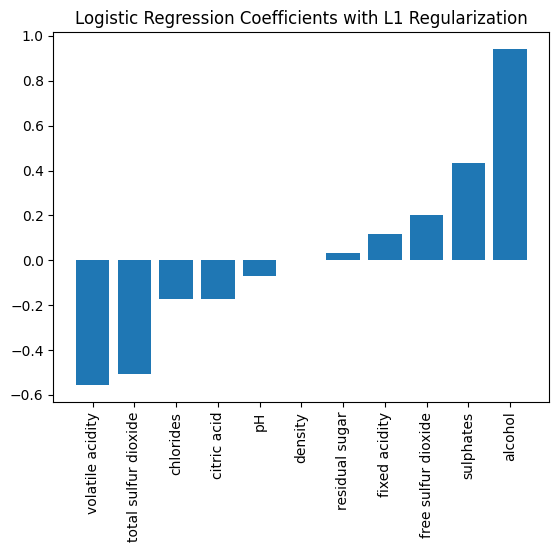

In [49]:
best_C_l1 = clf_l1.C_
coefficients_l1 = clf_l1.coef_.flatten()

feat_coef = pd.DataFrame({'features':features, 'coefficients': coefficients_l1}).sort_values(by='coefficients')

# Plot again
fig, ax = plt.subplots()
ax.bar(range(len(feat_coef['features'])), feat_coef['coefficients'])
ax.set_xticks(range(len(feat_coef['features'])), feat_coef['features'], rotation='vertical')
ax.set_title('Logistic Regression Coefficients with L1 Regularization')
plt.show()